In [1]:
from IPython.core.display import HTML, display
display(HTML('<style>.container { width:100%; !important } </style>'))

# Classifying Flowers using a Support Vector Machine

I have adapted this notebook from https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html.

In this notebook we will use different support vector machine to classify flowers from the iris dataset
using only the <em style="color:blue;">petal length</em> and the <em style="color:blue;">petal width</em>.
We will show how to plot the <em style="color:blue;">decision boundary</em> of a support vector machine.

We start with the usual imports for reading the data and plotting.

In [2]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

In order order to use support vector machines we have to import the module `svm` from SciKit-Learn.

In [3]:
import sklearn.svm as svm

Let us load the data and store it in a data frame.

In [4]:
IrisDF = pd.read_csv('iris.csv')
IrisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The function $\texttt{name_to_number}(name)$ converts the name of the flower into a number.

In [5]:
def name_to_number(name):
    if name == 'setosa':
        return 0
    if name == 'versicolor':
        return 1
    return 2

Since we want to have a two dimensinal model, we will only use the petal length and the petal width.

In [6]:
X = np.array(IrisDF[['petal_length', 'petal_width']])
y = np.array([name_to_number(name) for name in IrisDF['species']])

In order to plot the decision boundary ofthe linear model, we define the function 
$\texttt{make_meshgrid}(x, y, h)$.  This function gets two vectors $x$ and $y$ as inputs.  The parameter $h$ is the stepsize.  It returns a pair $(X, Y)$ where both $X$ and $Y$ are matrices of the same shape.  

In [7]:
def make_meshgrid(x, y, h=0.005):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    return np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

The function $\texttt{plot_contour}(M, X1, X2)$ is used to plot the decision boundaries for the classifier $M$.
$X$ and $Y$ are meshgrids for the `x` and `y` axis.

In [8]:
def plot_contour(M, X, Y):
    Z = M.predict(np.c_[X.ravel(), Y.ravel()])
    Z = Z.reshape(X.shape)
    plt.contourf(X, Y, Z, alpha=0.3)

Given a model $M$ and a two-dimensional design matrix $X$, this function plots the data from $X$ and a decisison boundary. 

In [9]:
def plot_data_and_boundary(X, M, title):
    X0, X1 = X[:, 0], X[:, 1]
    XX, YY = make_meshgrid(X0, X1)
    plt.figure(figsize=(15, 10))
    sns.set(style='darkgrid')
    plot_contour(M, XX, YY)
    plt.scatter(X0, X1, c=y, edgecolors='k')
    plt.xlim(XX.min(), XX.max())
    plt.ylim(YY.min(), YY.max())
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xticks()
    plt.yticks()
    plt.title(title)

We will start with a linear model.  The regularization parameter is set to $1.0$.

In [10]:
M = svm.SVC(kernel='linear', C=1.0)
M.fit(X, y)
M.score(X, y)

0.9666666666666667

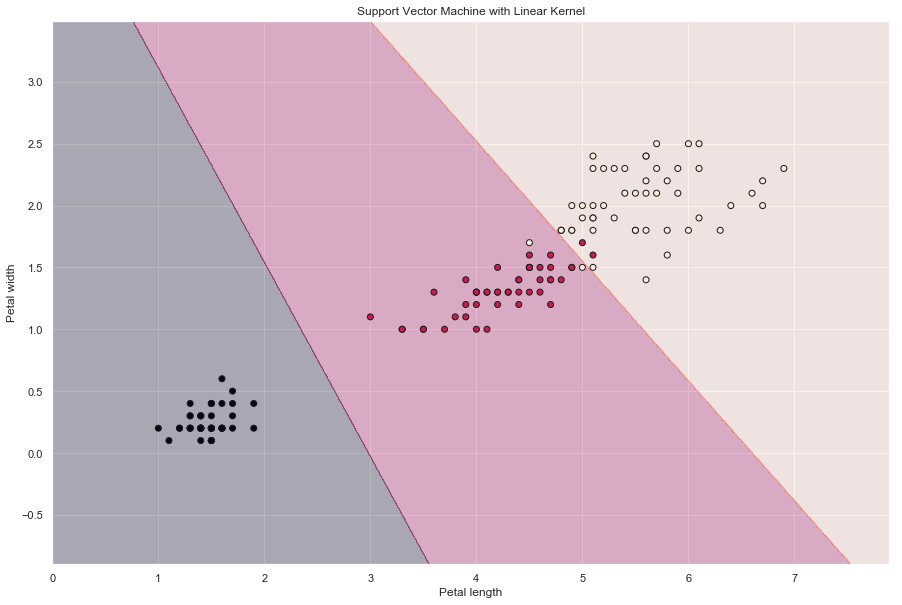

In [11]:
plot_data_and_boundary(X, M, 'Support Vector Machine with Linear Kernel')

The class `SVC` uses a <em style="color:blue;">One-vs-One</em> classifier, i.e. in this example it builds three support vector machines:
  -  The first SVM separates setosa from versicolor.
  -  The second SVM separates setosa from virginica.
  -  The third  SVM separates virginica from versicolor.

Lets have a <em style="color:blue;">Gaussian kernel function</em> next.

In [12]:
M = svm.SVC(kernel='rbf', gamma=1.5, C=1.0)
M.fit(X, y)
M.score(X, y)

0.9666666666666667

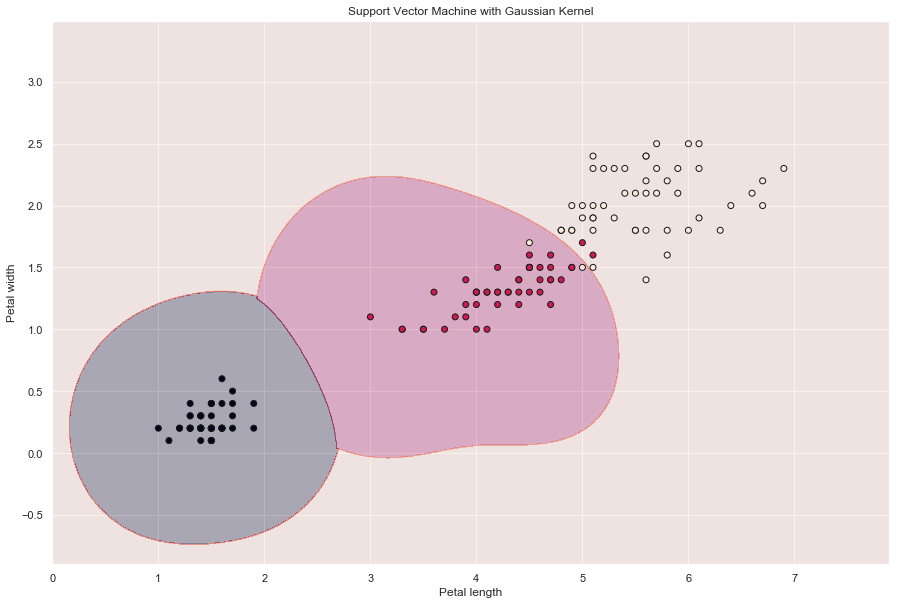

In [13]:
plot_data_and_boundary(X, M, 'Support Vector Machine with Gaussian Kernel')

In [14]:
M = svm.SVC(kernel='poly', degree=3, gamma='auto', C=1.0)
M.fit(X, y)
M.score(X, y)

0.96

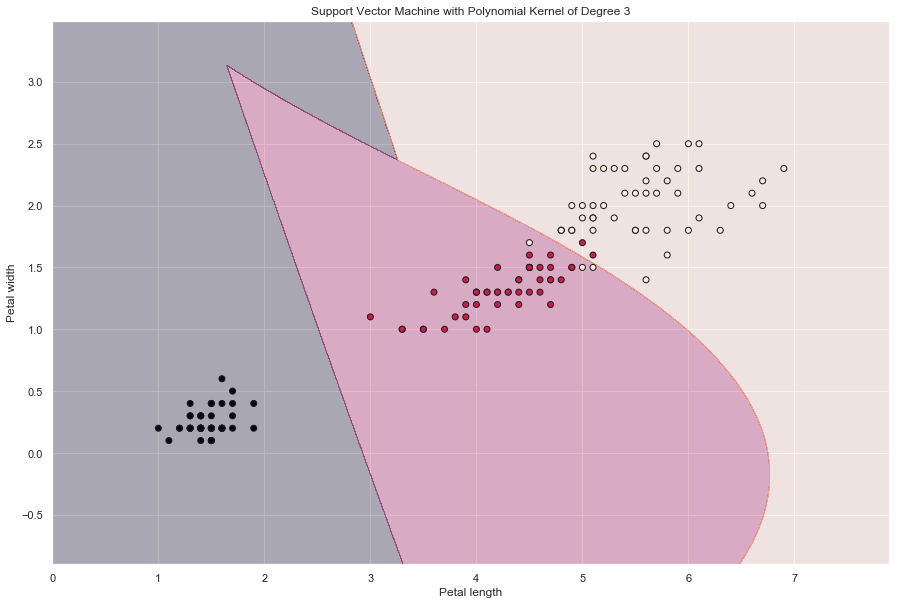

In [15]:
plot_data_and_boundary(X, M, 'Support Vector Machine with Polynomial Kernel of Degree 3')

Lets try the nuclear option and set the `degree` parameter to a high value.

In [16]:
M = svm.SVC(kernel='poly', degree=12, gamma='auto', C=1.0)
M.fit(X, y)
M.score(X, y)

0.98

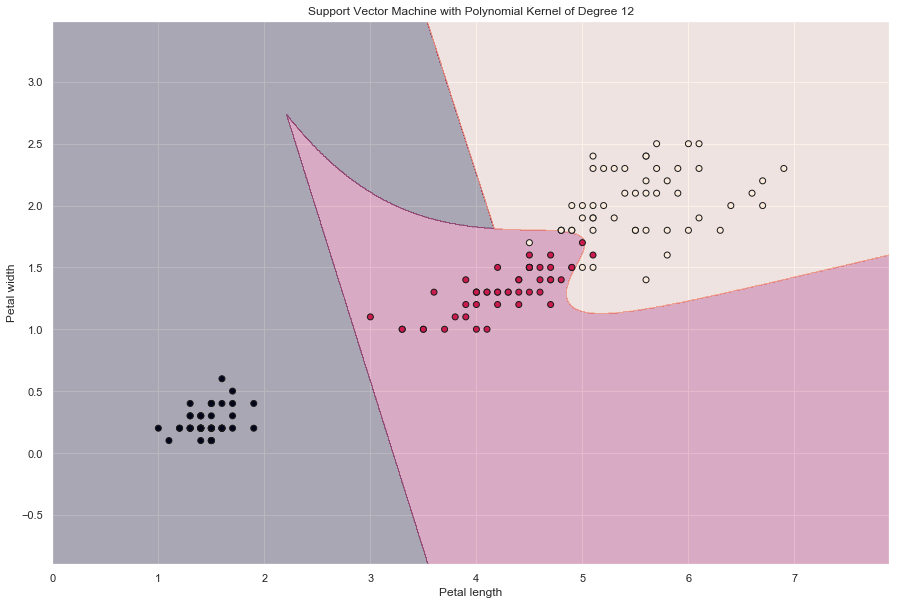

In [17]:
plot_data_and_boundary(X, M, 'Support Vector Machine with Polynomial Kernel of Degree 12')